In [7]:
import pandas as pd
data = pd.read_csv('./user_balance_table.csv', parse_dates=['report_date'])
data['report_date']

0         2014-08-05
1         2014-08-08
2         2014-08-11
3         2014-08-14
4         2014-08-17
             ...    
2840416   2014-08-25
2840417   2014-08-31
2840418   2014-07-24
2840419   2014-07-27
2840420   2014-03-05
Name: report_date, Length: 2840421, dtype: datetime64[ns]

In [8]:
#total_redeem_amt, total_purchase_amt
total_balance = data.groupby(['report_date'])['total_redeem_amt','total_purchase_amt'].sum()
total_balance


,total_redeem_amt,total_purchase_amt
report_date,,
2013-07-01,5525022,32488348
2013-07-02,2554548,29037390
2013-07-03,5953867,27270770
2013-07-04,6410729,18321185
2013-07-05,2763587,11648749
...,...,...
2014-08-27,468164147,302194801
2014-08-28,297893861,245082751
2014-08-29,273756380,267554713


In [9]:
#提取purchase和redeem
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]
redeem

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


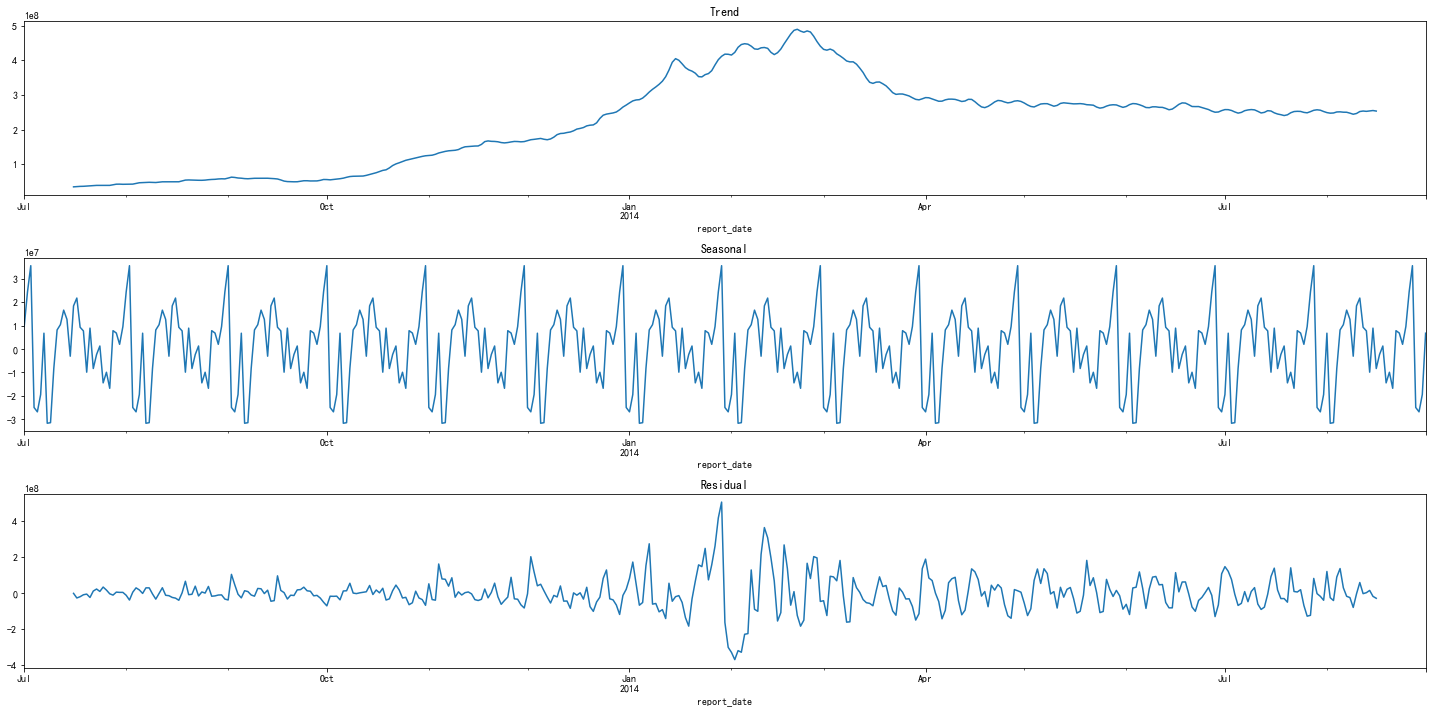

In [10]:
import matplotlib.pylab as plt
import statsmodels.api as sm
def plot_stl(data):
    #返回 trend趋势， seasonal季节， residual残差
    result = sm.tsa.seasonal_decompose(data, freq=30)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2, title='Seasonal')
    result.resid.plot(ax=ax3, title='Residual')
    plt.tight_layout()

plot_stl(purchase['total_purchase_amt'])

([<matplotlib.axis.XTick at 0x19501e69c88>,
 <a list of 30 Text xticklabel objects>)

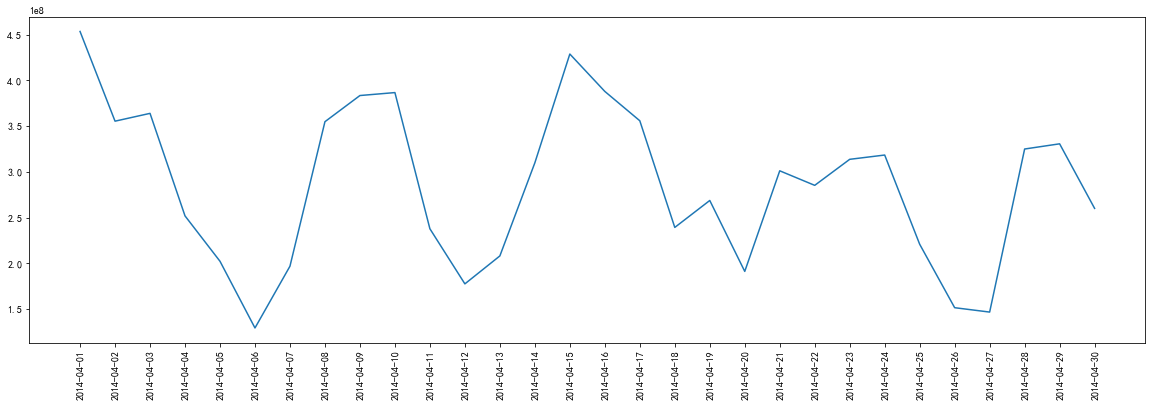

In [16]:
purchase2 = purchase[(purchase.index >= '2014-04-01') & (purchase.index <= '2014-04-30')]
redeem2 = redeem[(redeem.index >= '2014-04-01') & (redeem.index <= '2014-04-30')]

plt.figure(figsize=(20,6))
plt.plot(purchase2.total_purchase_amt)
date_range = pd.date_range('2014-04-01', '2014-04-30')
plt.xticks(date_range, rotation=90)

In [17]:
purchase2 = purchase[(purchase.index >= '2014-04-01') & (purchase.index <= '2014-08-31')]
redeem2 = redeem[(redeem.index >= '2014-04-01') & (redeem.index <= '2014-08-31')]

In [28]:
#对购买进行一阶差分
diff1 = purchase.diff(1)
sm.tsa.stattools.adfuller(diff1['total_purchase_amt'][1:])
#一阶差分之后稳定

(-7.947102224652354,
 3.1981868624879897e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [33]:
from statsmodels.tsa.arima_model import ARIMA
#选择p,q
model = ARIMA(purchase, order=(7,1,5)).fit()
#对购买进行预测，使用typ='levels' ,得到元数据level的预测值
purchase_pred = model.predict('2014-09-01','2014-09-30',typ='levels')
purchase_pred

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2014-09-01    3.310541e+08
2014-09-02    3.318767e+08
2014-09-03    3.338919e+08
2014-09-04    2.983197e+08
2014-09-05    2.407522e+08
2014-09-06    2.266145e+08
2014-09-07    2.435559e+08
2014-09-08    2.970871e+08
2014-09-09    3.321276e+08
2014-09-10    3.265207e+08
2014-09-11    2.916846e+08
2014-09-12    2.392710e+08
2014-09-13    2.253556e+08
2014-09-14    2.475290e+08
2014-09-15    2.950941e+08
2014-09-16    3.345011e+08
2014-09-17    3.280825e+08
2014-09-18    2.927106e+08
2014-09-19    2.448972e+08
2014-09-20    2.275717e+08
2014-09-21    2.530230e+08
2014-09-22    2.980722e+08
2014-09-23    3.366750e+08
2014-09-24    3.321953e+08
2014-09-25    2.947114e+08
2014-09-26    2.505388e+08
2014-09-27    2.318274e+08
2014-09-28    2.574472e+08
2014-09-29    3.025703e+08
2014-09-30    3.387022e+08
Freq: D, dtype: float64

In [38]:
#进行redeem一阶差分
diff1 = redeem.diff(1)
#sm.tsa.stattools.adfuller(diff1['total_purchase_amt'][1:])
sm.tsa.stattools.adfuller(diff1.total_redeem_amt[1:])
#一阶差分之后稳定

(-11.69198690696882,
 1.6443717458499181e-21,
 12,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15779.04993673871)

In [39]:
#选择p,q
model = ARIMA(redeem, order=(7,1,5)).fit()
#对购买进行预测，使用typ='levels' ,得到元数据level的预测值
redeem_pred = model.predict('2014-09-01','2014-09-30',typ='levels')
redeem_pred

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
d:\ProgramData\Anaconda3

2014-09-01    3.166294e+08
2014-09-02    3.369109e+08
2014-09-03    3.628522e+08
2014-09-04    3.070689e+08
2014-09-05    2.623751e+08
2014-09-06    2.254243e+08
2014-09-07    2.587594e+08
2014-09-08    3.110024e+08
2014-09-09    3.471635e+08
2014-09-10    3.556423e+08
2014-09-11    3.086863e+08
2014-09-12    2.592931e+08
2014-09-13    2.333586e+08
2014-09-14    2.572542e+08
2014-09-15    3.119378e+08
2014-09-16    3.530797e+08
2014-09-17    3.567109e+08
2014-09-18    3.139890e+08
2014-09-19    2.620660e+08
2014-09-20    2.381658e+08
2014-09-21    2.610266e+08
2014-09-22    3.150884e+08
2014-09-23    3.581519e+08
2014-09-24    3.604895e+08
2014-09-25    3.191540e+08
2014-09-26    2.666004e+08
2014-09-27    2.426994e+08
2014-09-28    2.655200e+08
2014-09-29    3.190792e+08
2014-09-30    3.628851e+08
Freq: D, dtype: float64

In [45]:
result = pd.DataFrame()
result['report_date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values
result['report_date'] = result['report_date'].apply(lambda x: str(x).replace('-','')[:8])
result.to_csv('result.csv', header=None, index=None)
result

,report_date,purchase,redeem
0,20140901,3.310541e+08,3.166294e+08
1,20140902,3.318767e+08,3.369109e+08
2,20140903,3.338919e+08,3.628522e+08
3,20140904,2.983197e+08,3.070689e+08
4,20140905,2.407522e+08,2.623751e+08
5,20140906,2.266145e+08,2.254243e+08
6,20140907,2.435559e+08,2.587594e+08
7,20140908,2.970871e+08,3.110024e+08
8,20140909,3.321276e+08,3.471635e+08
9,20140910,3.265207e+08,3.556423e+08


以上为一阶差分的ARIMA， 但是我有个疑问，在用ARIMA模型进行预测的时候，还是原始的redeem和purchase，并没有用一阶差分的值计算，
所以这个部分没有使用一阶差分来预测？使用一阶差分预测之后，如何逆运算？